In [1]:
from validphys import Loader
from validphys.core import DataSetSpec, PDF, PDFSETS
from validphys.results import one_or_more_results

In [12]:
l = Loader('/home/zah/nngit/nnpdfcpp/data/','/home/zah/nngit/nnpdfcpp/nnpdfbuild/results/')
thno = 53
dsname = 'ATLASWZTOT13TEV81PB'
cfactors = ['NRM', 'QCD']

ds = l.check_dataset(name=dsname, theoryid=thno, cfac=cfactors, use_cuts=False)

In [8]:
nn30 = PDFSETS.NNPDF30_nnlo_as_0118

In [9]:
nn31 = PDF('161005-rb82845b-008')

In [10]:
resd, res30, res31 = one_or_more_results(ds, [nn30, nn31])

In [102]:
import ruamel_yaml as yaml

In [103]:
plot_d = yaml.load(cd.plotfiles[0].open())
plot_d

{'extra_labels': {' ': ['$W^-$', '$W^+$', 'Z'], 'boson': ['W', 'W', 'Z']},
 'figure_by': ['boson'],
 'x': ' ',
 'y_label': '$\\sigma^{fid}$ (fb)'}

In [104]:

xlabel, ylabel = plot_d['extra_labels'][' '][:2]
units = plot_d['y_label']

In [105]:
units

'$\\sigma^{fid}$ (fb)'

In [106]:
import numpy as np
import numpy.linalg as la

In [107]:
cov = resd.covmat[:2,:2]
cov

array([[  9.90000000e+09,   7.00000000e+09],
       [  7.00000000e+09,   1.82000000e+10]])

In [108]:
vals, vects = la.eigh(cov)

In [109]:
vals = np.sqrt(vals)

In [110]:
cov

array([[  9.90000000e+09,   7.00000000e+09],
       [  7.00000000e+09,   1.82000000e+10]])

In [111]:
cv = resd.central_value[:2]

In [112]:
%matplotlib inline

In [113]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [114]:
vects

array([[-0.86889896,  0.49498949],
       [ 0.49498949,  0.86889896]])

In [116]:
vals, vects = la.eigh(resd.covmat[:2,:2])

In [117]:
vals = np.sqrt(vals)

In [118]:
vals/1e6

array([ 0.07689135,  0.14895543])

In [119]:
res30.central_value

array([ 3442638.    ,  4531972.    ,   744542.5625], dtype=float32)

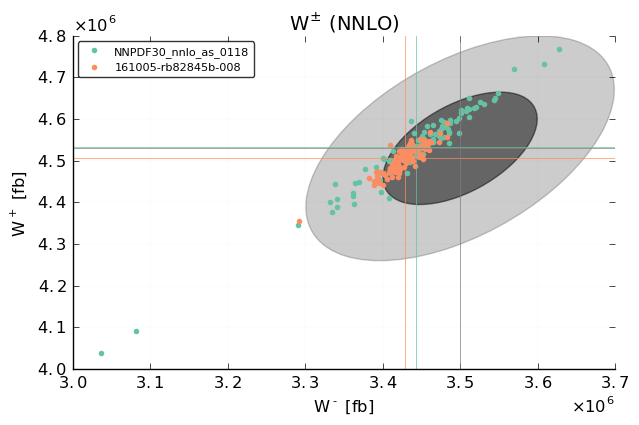

In [120]:
from validphys.app import app

plt.style.use("/home/zah/nngit/validphys2/src/validphys/small.mplstyle")

angle = np.arctan2(vects[0,1], vects[0,0])*180/np.pi



el1s = Ellipse(xy=cv, angle=angle, width=2*vals[0], height=2*vals[1], zorder=1)
el2s = Ellipse(xy=cv, angle=angle, width=4*vals[0], height=4*vals[1], zorder=1)

#fig = plt.figure(0)
#ax = fig.add_subplot(111, aspect='equal')

fig, ax = plt.subplots()

color30 = next(ax._get_lines.prop_cycler)['color']
color31 = next(ax._get_lines.prop_cycler)['color']

ax.plot(*res30._rawdata[:2,:], 'o', label=nn30.name, color=color30)
ax.plot(*res31._rawdata[:2,:], 'o', label=nn31.name, color=color31)

ax.axvline(res30.central_value[0], color=color30, linewidth=0.5)
ax.axhline(res30.central_value[1], color=color30,linewidth=0.5)

ax.axvline(res31.central_value[0], color=color31,linewidth=0.5)
ax.axhline(res31.central_value[1], color=color31,linewidth=0.5)

ax.axvline(resd.central_value[0], color='grey',linewidth=0.5)
ax.axhline(resd.central_value[1], color='grey',linewidth=0.5)


ax.add_artist(el1s)
ax.add_artist(el2s)

el1s.set_facecolor('black')
el1s.set_alpha(0.5)
el1s.set(label = "$1 \sigma$")

el2s.set_facecolor('black')
el2s.set_alpha(0.2)

ax.set_xlabel("%s [fb]"%xlabel)
ax.set_ylabel("%s [fb]"%ylabel)

ax.set_axisbelow(True)
ax.set_title("$W^{\pm}$ (NNLO)")
ax.legend()


In [99]:
fig.savefig("wabs.pdf")